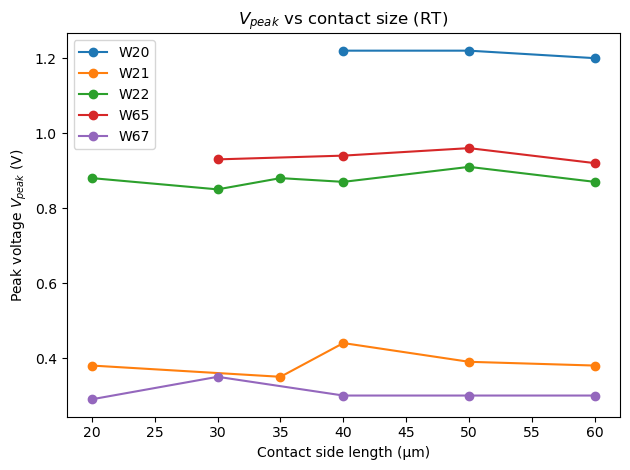

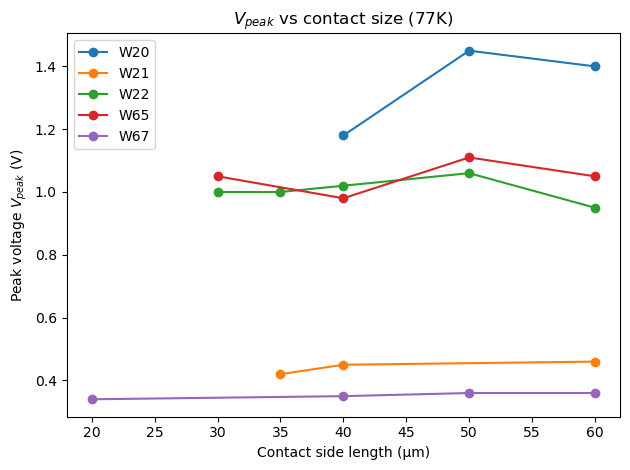

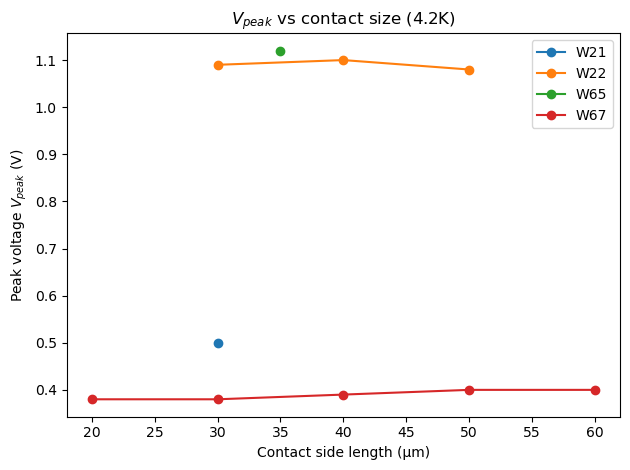


Constancy vs a constant fit y=c across contact sizes (c is mean V_peak):

Temp  Wafer   n  c_mean_V    std_V  range_V   RMSE_V max_abs_dev_V  RMSE_% range_% maxdev_%
-------------------------------------------------------------------------------------------
RT    W20     3     1.213   0.0115   0.0200   0.0094       0.0133  0.7770   1.648    1.099
RT    W21     5    0.3880   0.0327   0.0900   0.0293       0.0520   7.541  23.196   13.402
RT    W22     6    0.8767   0.0197   0.0600   0.0180       0.0333   2.048   6.844    3.802
RT    W65     4    0.9375   0.0171   0.0400   0.0148       0.0225   1.578   4.267    2.400
RT    W67     5    0.3080   0.0239   0.0600   0.0214       0.0420   6.933  19.481   13.636
77K   W20     3     1.343   0.1436   0.2700   0.1173       0.1633   8.731  20.099   12.159
77K   W21     3    0.4433   0.0208   0.0400   0.0170       0.0233   3.834   9.023    5.263
77K   W22     5     1.006   0.0397   0.1100   0.0356       0.0560   3.534  10.934    5.567
77K   W65    

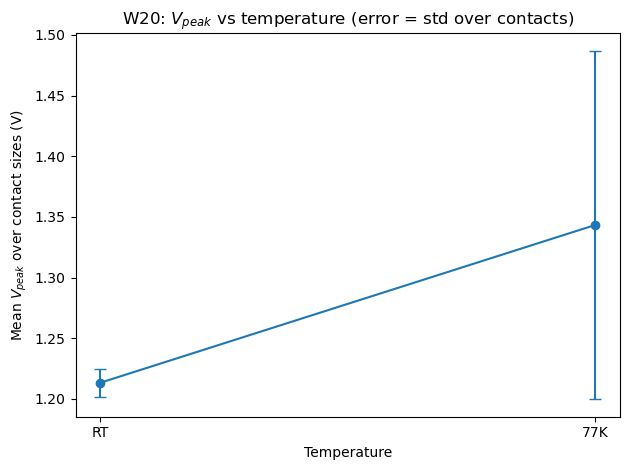

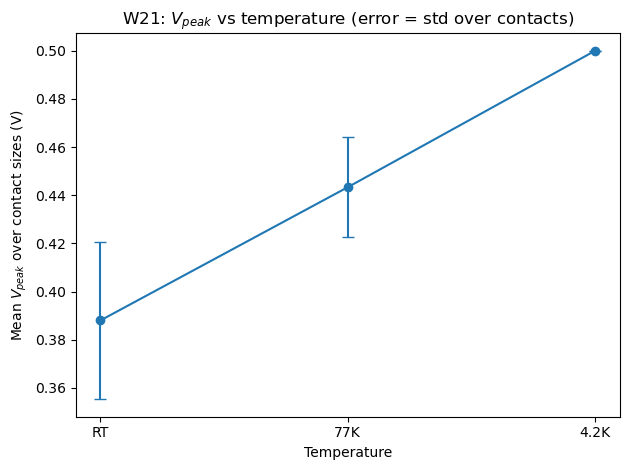

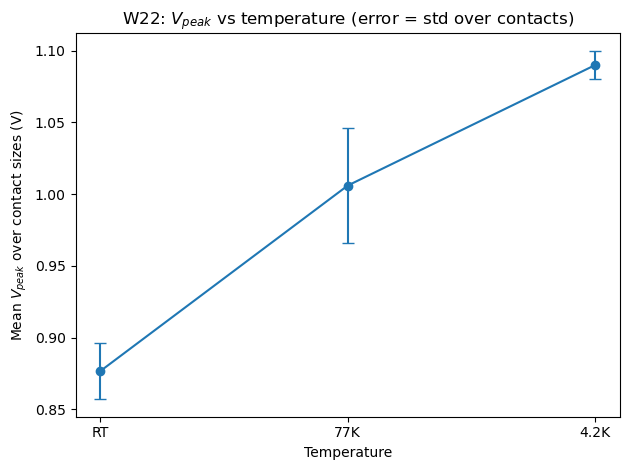

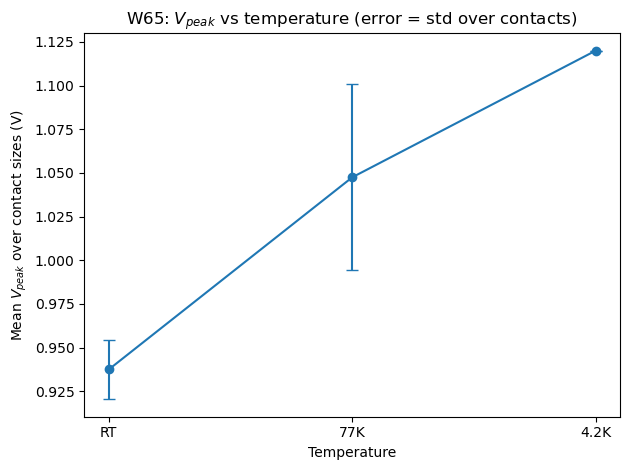

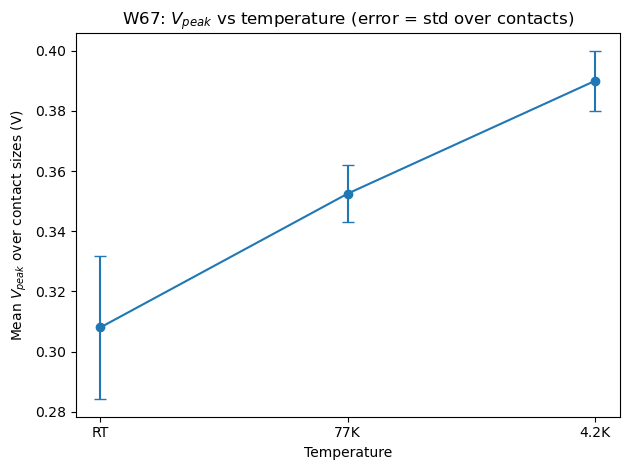

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1) ENTER DATA (RT + 77K + 4.2K)
# =========================
Vp = {
    "RT": {
        "W20": {40: 1.22, 50: 1.22, 60: 1.20},
        "W21": {20: 0.38, 35: 0.35, 40: 0.44, 50: 0.39, 60: 0.38},
        "W22": {20: 0.88, 30: 0.85, 35: 0.88, 40: 0.87, 50: 0.91, 60: 0.87},
        "W65": {30: 0.93, 40: 0.94, 50: 0.96, 60: 0.92},
        "W67": {20: 0.29, 30: 0.35, 40: 0.30, 50: 0.30, 60: 0.30},
    },
    "77K": {
        "W20": {40: 1.18, 50: 1.45, 60: 1.40},
        "W21": {35: 0.42, 40: 0.45, 60: 0.46},
        "W22": {30: 1.00, 35: 1.00, 40: 1.02, 50: 1.06, 60: 0.95},
        "W65": {30: 1.05, 40: 0.98, 50: 1.11, 60: 1.05},
        "W67": {20: 0.34, 40: 0.35, 50: 0.36, 60: 0.36},
    },
    "4.2K": {
        "W20": {},  # None / no peak
        "W21": {30: 0.50},
        "W22": {30: 1.09, 40: 1.10, 50: 1.08},
        "W65": {35: 1.12},
        "W67": {20: 0.38, 30: 0.38, 40: 0.39, 50: 0.40, 60: 0.40},
    },
}

TEMPS_ORDER = ["RT", "77K", "4.2K"]

# =========================
# 2) HELPERS
# =========================
def const_fit_metrics(y):
    """
    Fit y = c (least squares). c_hat = mean(y).
    Returns constancy metrics across contact sizes.
    """
    y = np.asarray(y, dtype=float)
    n = y.size
    c = float(np.mean(y)) if n else np.nan
    r = y - c if n else np.array([])

    sse = float(np.sum(r**2)) if n else np.nan
    rmse = float(np.sqrt(sse / n)) if n else np.nan
    std = float(np.std(y, ddof=1)) if n >= 2 else (0.0 if n == 1 else np.nan)
    rng = float(np.max(y) - np.min(y)) if n else np.nan
    max_abs_dev = float(np.max(np.abs(r))) if n else np.nan

    rel = lambda v: (100.0 * v / abs(c)) if (n and c != 0 and np.isfinite(c)) else np.nan

    return {
        "n": int(n),
        "c_mean_V": c,
        "std_V": std,
        "range_V": rng,
        "RMSE_V": rmse,
        "max_abs_dev_V": max_abs_dev,
        "RMSE_%": rel(rmse),
        "range_%": rel(rng),
        "maxdev_%": rel(max_abs_dev),
    }

def get_xy(points_dict):
    xs = np.array(sorted(points_dict.keys()), dtype=float)
    ys = np.array([points_dict[int(x)] if int(x) in points_dict else points_dict[x] for x in xs], dtype=float)
    return xs, ys

# =========================
# 3) GRAPHS: Vpeak vs contact size (RT, 77K, 4.2K)
# =========================
def plot_temp(Vp_dict, temp_label):
    plt.figure()
    for wafer in sorted(Vp_dict[temp_label].keys()):
        pts = Vp_dict[temp_label][wafer]
        if not pts:
            continue
        xs, ys = get_xy(pts)
        plt.plot(xs, ys, marker="o", linestyle="-", label=wafer)

    plt.xlabel("Contact side length (µm)")
    plt.ylabel("Peak voltage $V_{peak}$ (V)")
    plt.title(f"$V_{{peak}}$ vs contact size ({temp_label})")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_temp(Vp, "RT")
plot_temp(Vp, "77K")
plot_temp(Vp, "4.2K")

# =========================
# 4) NUMERICAL TABLE: CONSTANCY ACROSS CONTACT SIZES
# =========================
def print_constancy_table(Vp_dict, temps):
    cols = [
        ("n", 3),
        ("c_mean_V", 9),
        ("std_V", 8),
        ("range_V", 8),
        ("RMSE_V", 8),
        ("max_abs_dev_V", 12),
        ("RMSE_%", 7),
        ("range_%", 7),
        ("maxdev_%", 8),
    ]
    header = "Temp  Wafer " + " ".join([f"{k:>{w}}" for k, w in cols])
    print(header)
    print("-" * len(header))

    for temp in temps:
        wafers = Vp_dict.get(temp, {})
        for wafer in sorted(wafers.keys()):
            pts = wafers[wafer]
            if not pts:
                continue
            _, ys = get_xy(pts)
            m = const_fit_metrics(ys)

            def fmt(name):
                v = m[name]
                if name == "n":
                    return f"{v:d}"
                if v is None or (isinstance(v, float) and not np.isfinite(v)):
                    return "nan"
                # readable precision
                return f"{v:.3f}" if abs(v) >= 1 else f"{v:.4f}"

            row = f"{temp:<5} {wafer:<5} " + " ".join([f"{fmt(k):>{w}}" for k, w in cols])
            print(row)

print("\nConstancy vs a constant fit y=c across contact sizes (c is mean V_peak):\n")
print_constancy_table(Vp, TEMPS_ORDER)

# =========================
# 5) TEMPERATURE COMPARISON PER CHIP
#    (use mean Vpeak over contacts at each temperature, with std as “error bar”)
# =========================
def wafer_temp_summary(Vp_dict, temps_order):
    # gather all wafers present anywhere
    wafers = sorted({w for t in Vp_dict for w in Vp_dict[t].keys()})
    out = {w: {} for w in wafers}

    for w in wafers:
        for t in temps_order:
            pts = Vp_dict.get(t, {}).get(w, {})
            if not pts:
                out[w][t] = {"n": 0, "mean": np.nan, "std": np.nan}
                continue
            _, ys = get_xy(pts)
            out[w][t] = {
                "n": int(len(ys)),
                "mean": float(np.mean(ys)),
                "std": float(np.std(ys, ddof=1)) if len(ys) >= 2 else 0.0,
            }
    return out

summ = wafer_temp_summary(Vp, TEMPS_ORDER)

# Print a compact table + deltas
print("\nPer-wafer temperature dependence (mean over contact sizes; std over contacts):\n")
print("Wafer  RT_mean  RT_std   77K_mean  77K_std   4.2K_mean  4.2K_std   Δ(77-RT)   Δ(4.2-RT)   Δ(4.2-77)")
print("-" * 104)

for wafer in sorted(summ.keys()):
    rt = summ[wafer]["RT"]
    k77 = summ[wafer]["77K"]
    k42 = summ[wafer]["4.2K"]

    d77_rt = k77["mean"] - rt["mean"] if np.isfinite(k77["mean"]) and np.isfinite(rt["mean"]) else np.nan
    d42_rt = k42["mean"] - rt["mean"] if np.isfinite(k42["mean"]) and np.isfinite(rt["mean"]) else np.nan
    d42_77 = k42["mean"] - k77["mean"] if np.isfinite(k42["mean"]) and np.isfinite(k77["mean"]) else np.nan

    def f(v, ndp=3):
        return f"{v:.{ndp}f}" if np.isfinite(v) else "nan"

    print(
        f"{wafer:<5} "
        f"{f(rt['mean']):>7} {f(rt['std']):>7}   "
        f"{f(k77['mean']):>7} {f(k77['std']):>7}   "
        f"{f(k42['mean']):>8} {f(k42['std']):>8}   "
        f"{f(d77_rt):>8}   {f(d42_rt):>9}   {f(d42_77):>9}"
    )

# Plot: for each wafer, mean Vpeak vs temperature with error bars (std over contact sizes)
for wafer in sorted(summ.keys()):
    means, errs, labels = [], [], []
    for t in TEMPS_ORDER:
        m = summ[wafer][t]["mean"]
        s = summ[wafer][t]["std"]
        if np.isfinite(m):
            means.append(m)
            errs.append(s)
            labels.append(t)

    if len(means) < 2:
        continue  # not enough temps to compare meaningfully

    x = np.arange(len(labels))
    plt.figure()
    plt.errorbar(x, means, yerr=errs, marker="o", linestyle="-", capsize=4)
    plt.xticks(x, labels)
    plt.xlabel("Temperature")
    plt.ylabel("Mean $V_{peak}$ over contact sizes (V)")
    plt.title(f"{wafer}: $V_{{peak}}$ vs temperature (error = std over contacts)")
    plt.tight_layout()
    plt.show()

In [6]:
# =========================
# DROP-IN: CHECK WHETHER PEAK VOLTAGE INCREASES BY SAME PROPORTION (PER CHIP)
# =========================
# Uses your existing Vp dict:
# Vp[temp][wafer][side_um] = V_peak (V)

TEMPS_ORDER = ["RT", "77K", "4.2K"]

def _overlap_ratios_from_dict(D, wafer, t_num, t_den):
    """Return list of ratios D(t_num)/D(t_den) over contact sizes common to both temps."""
    d_num = D.get(t_num, {}).get(wafer, {})
    d_den = D.get(t_den, {}).get(wafer, {})
    common = sorted(set(d_num.keys()) & set(d_den.keys()))
    ratios = []

    for s in common:
        yn = float(d_num[s])
        yd = float(d_den[s])
        if np.isfinite(yn) and np.isfinite(yd) and yd != 0:
            ratios.append(yn / yd)

    return common, np.array(ratios, dtype=float)

def print_peak_voltage_ratio_table(Vp, pairs=(("77K","RT"), ("4.2K","RT"), ("4.2K","77K"))):
    wafers = sorted({w for t in Vp for w in Vp[t]})

    print("\nPeak-voltage proportional change (ratios using ONLY overlapping contact sizes):\n")
    print("Wafer  Pair       n  mean_ratio   std_ratio   min_ratio   max_ratio   CV_%")
    print("-"*74)

    out = {}
    for wafer in wafers:
        out[wafer] = {}
        for (tn, td) in pairs:
            common, ratios = _overlap_ratios_from_dict(Vp, wafer, tn, td)
            n = ratios.size
            if n == 0:
                out[wafer][(tn,td)] = None
                continue

            mean = float(np.mean(ratios))
            std  = float(np.std(ratios, ddof=1)) if n >= 2 else 0.0
            rmin = float(np.min(ratios))
            rmax = float(np.max(ratios))
            cv   = 100.0 * std / abs(mean) if mean != 0 else np.nan

            out[wafer][(tn,td)] = {
                "n": n, "mean": mean, "std": std, "min": rmin, "max": rmax, "cv_%": cv,
                "common_sizes_um": common,
                "ratios_by_size": dict(zip(common, ratios.tolist())),
            }

            print(f"{wafer:<5}  {tn:>4}/{td:<4}  {n:>2}  {mean:>10.3f}  {std:>10.3f}  {rmin:>10.3f}  {rmax:>10.3f}  {cv:>6.1f}")

    return out

ratio_results_Vp = print_peak_voltage_ratio_table(Vp)

# Optional: plot ratio vs contact size to see if the proportional change is consistent across sizes
def plot_vpeak_ratios_vs_size(Vp, wafer, t_num, t_den):
    common, ratios = _overlap_ratios_from_dict(Vp, wafer, t_num, t_den)
    if ratios.size == 0:
        return
    plt.figure()
    plt.plot(common, ratios, marker="o", linestyle="-")
    plt.xlabel("Contact side length (µm)")
    plt.ylabel(f"V_peak ratio: {t_num}/{t_den}")
    plt.title(f"{wafer}: proportional change in V_peak vs size")
    plt.tight_layout()
    plt.show()

# Example (uncomment):
# for w in sorted({w for t in Vp for w in Vp[t]}):
#     plot_vpeak_ratios_vs_size(Vp, w, "77K", "RT")
#     plot_vpeak_ratios_vs_size(Vp, w, "4.2K", "RT")


Peak-voltage proportional change (ratios using ONLY overlapping contact sizes):

Wafer  Pair       n  mean_ratio   std_ratio   min_ratio   max_ratio   CV_%
--------------------------------------------------------------------------
W20     77K/RT     3       1.107       0.122       0.967       1.189    11.0
W21     77K/RT     3       1.144       0.106       1.023       1.211     9.2
W22     77K/RT     5       1.148       0.035       1.092       1.176     3.1
W22    4.2K/RT     3       1.245       0.051       1.187       1.282     4.1
W22    4.2K/77K    3       1.062       0.038       1.019       1.090     3.6
W65     77K/RT     4       1.117       0.051       1.043       1.156     4.6
W67     77K/RT     4       1.185       0.018       1.167       1.200     1.5
W67    4.2K/RT     5       1.273       0.105       1.086       1.333     8.3
W67    4.2K/77K    4       1.114       0.003       1.111       1.118     0.3
